<a href="https://colab.research.google.com/github/Yujini68/ESAA/blob/main/OB_%EB%B0%A9%ED%95%99_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM
from keras import layers
from sklearn.metrics import mean_squared_error

In [ ]:
# 데이터 불러오기
nflx_data = pd.read_csv("/content/NFLX.csv")

In [ ]:
nflx_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
# 결측치 확인
nflx_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
nflx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
nflx_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
nflx_data.shape

(1009, 7)

In [ ]:
# 날짜를 datetime 형식으로 변환, 인덱스 설정
nflx_data['Date'] = pd.to_datetime(nflx_data['Date'])
nflx_data.set_index('Date', inplace=True)

In [ ]:
nflx_data['Year'] = nflx_data.index.year  # 연도 추출
nflx_data['Month'] = nflx_data.index.month  # 월 추출
nflx_data['Day'] = nflx_data.index.day # 일 추출

In [ ]:
nflx_data.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Date,,,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,2,5
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,2,6
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,2,7
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,2,8
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,2,9


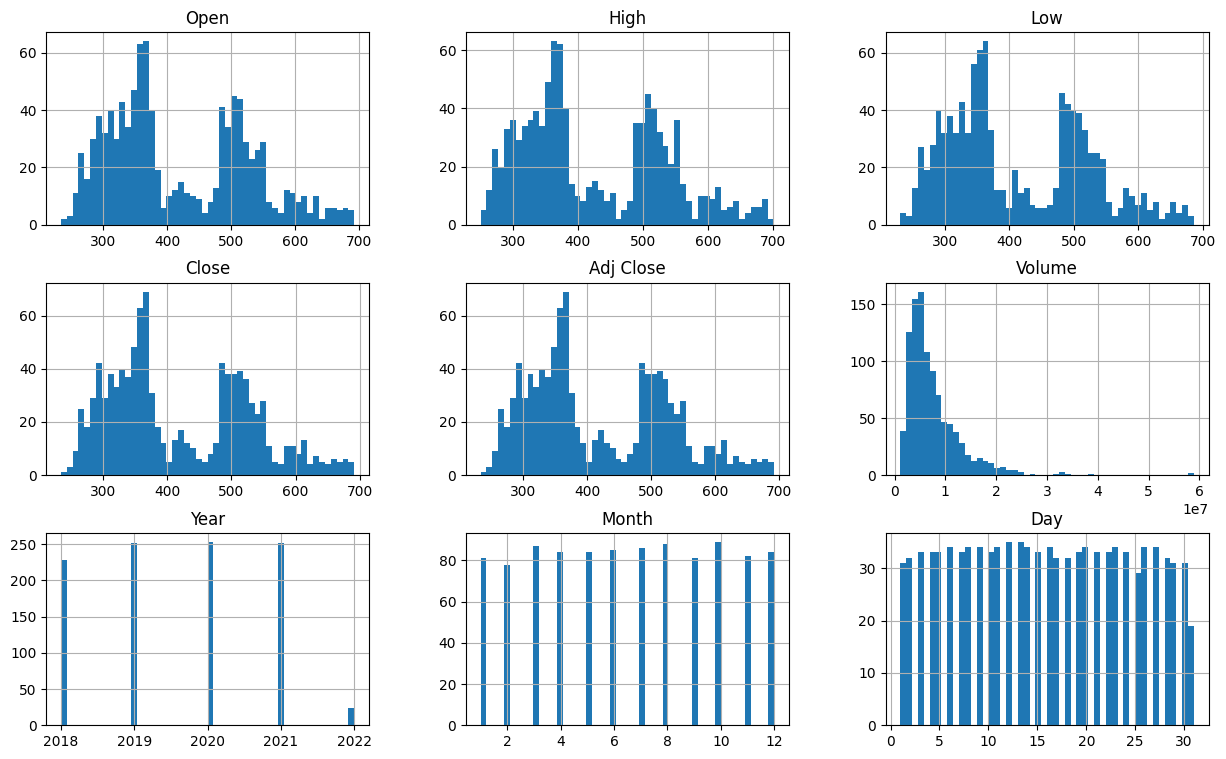

In [ ]:
nflx_data.hist(figsize = (15,9), bins = 50)
plt.show()

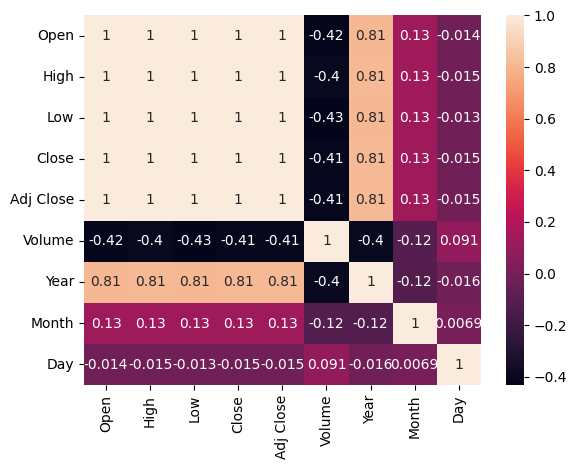

In [ ]:
sns.heatmap(nflx_data.corr(), annot = True)
plt.show()

<Axes: xlabel='Year'>

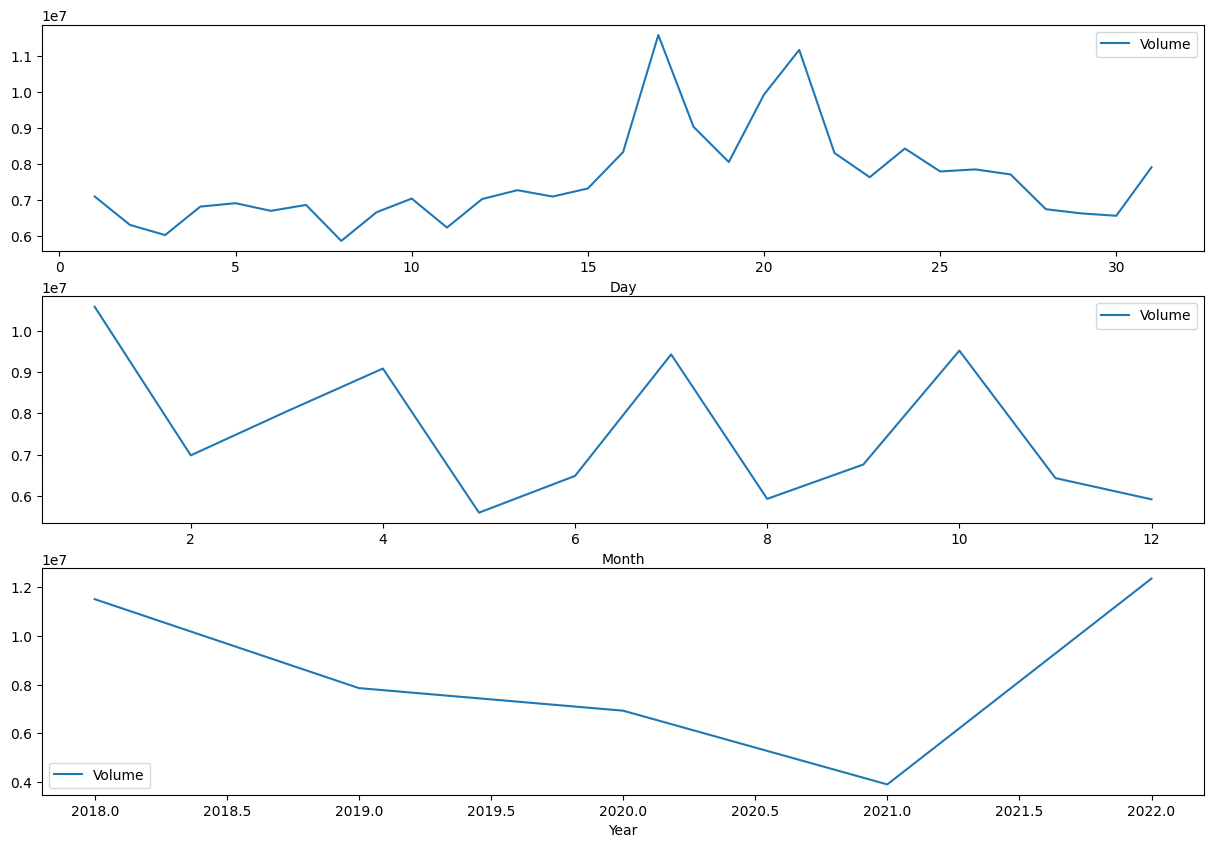

In [ ]:
# 일,월,년 별 거래량
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize = (15,10))
nflx_data.groupby(nflx_data.index.day).mean().plot(y ="Volume", ax=ax1, xlabel= "Day")
nflx_data.groupby(nflx_data.index.month).mean().plot(y ="Volume", ax=ax2, xlabel= "Month")
nflx_data.groupby(nflx_data.index.year).mean().plot(y="Volume", ax=ax3, xlabel= "Year")

<Axes: xlabel='Date', ylabel='Low'>

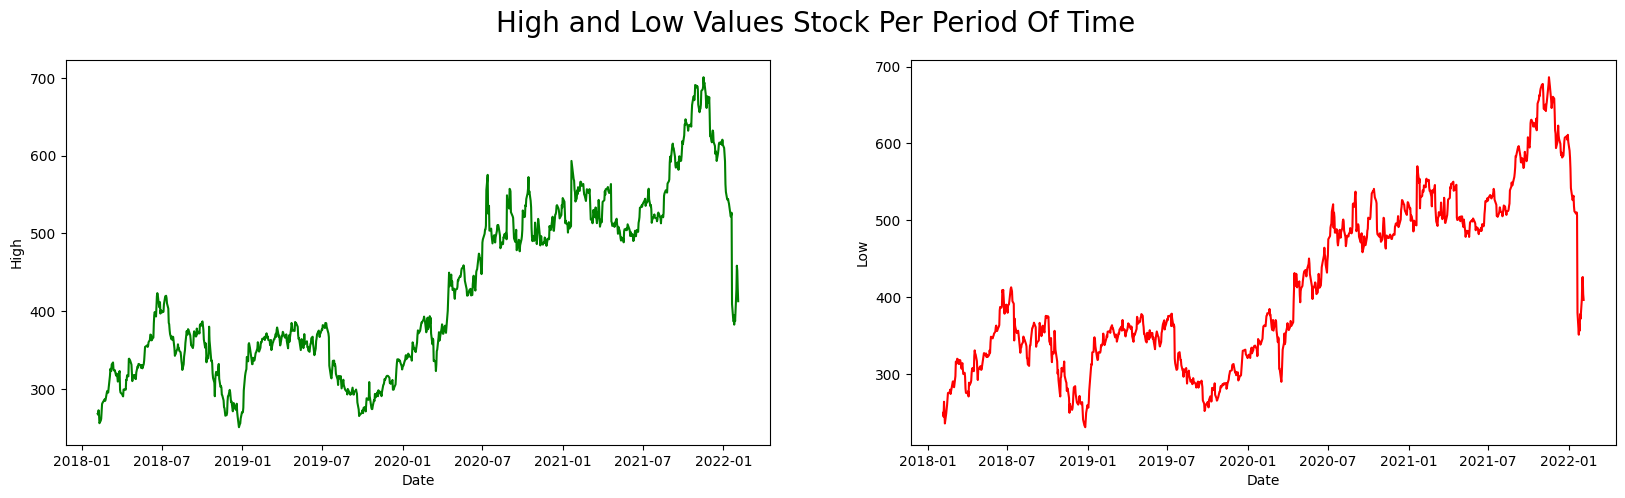

In [ ]:
# 고점 및 저점
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,5))
plt.suptitle('High and Low Values Stock Per Period Of Time', fontsize=20)
sns.lineplot(ax=axes[0], y=nflx_data['High'], x=nflx_data.index, color="green")
sns.lineplot(ax=axes[1], y=nflx_data['Low'], x=nflx_data.index, color="red")

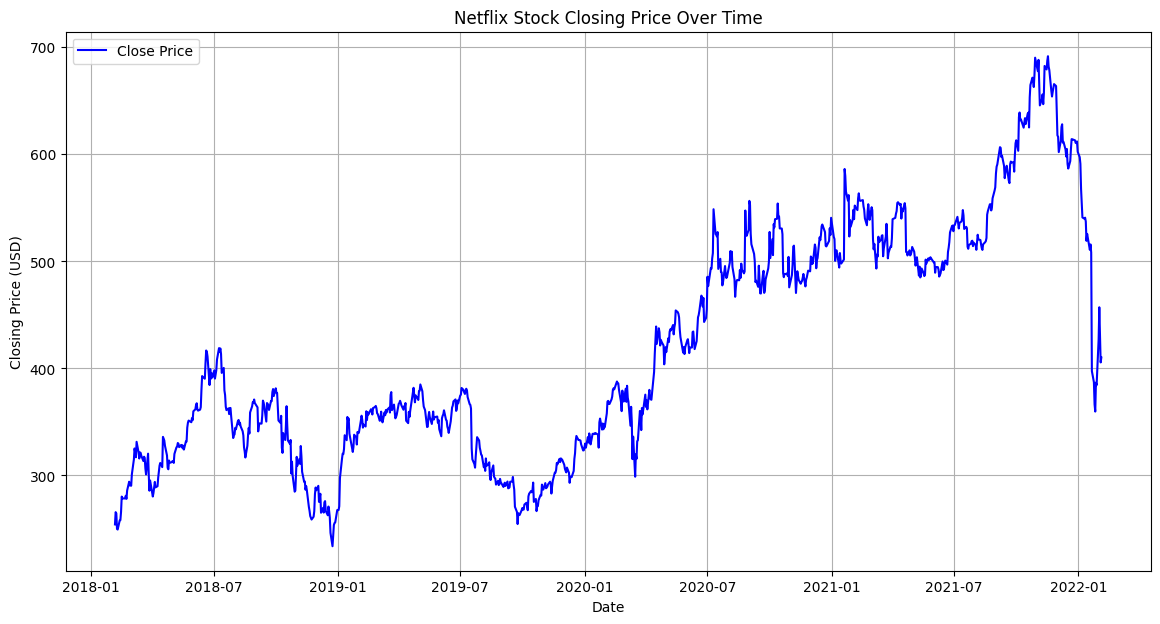

In [ ]:
# 시간 경과에 따른 종가 표시
plt.figure(figsize=(14, 7))
plt.plot(nflx_data['Close'], label='Close Price', color='blue')
plt.title('Netflix Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.show()

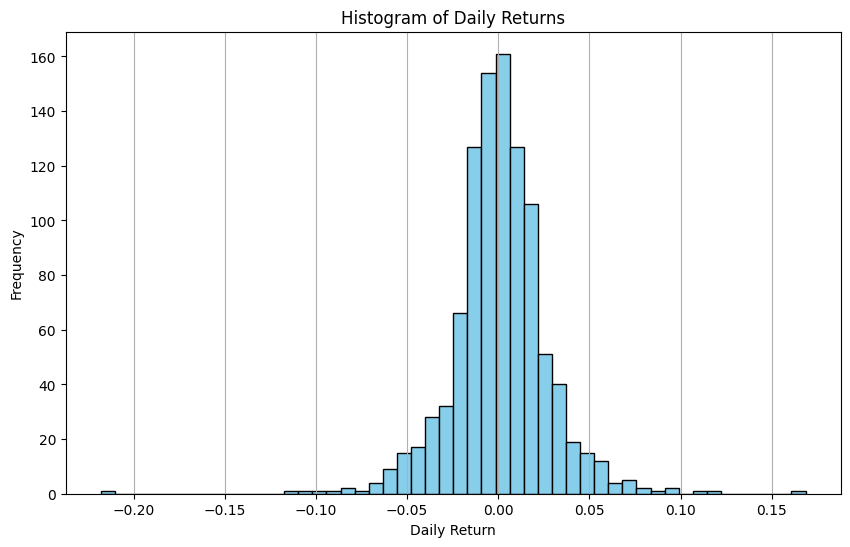

In [ ]:
# 일일 수익률
nflx_data['Daily Return'] = nflx_data['Close'].pct_change()

plt.figure(figsize=(10, 6))
nflx_data['Daily Return'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [ ]:
# 일일 수익률의 통계 요약
daily_return_stats = nflx_data['Daily Return'].describe()
print(daily_return_stats)

count    1008.000000
mean        0.000831
std         0.026603
min        -0.217905
25%        -0.011933
50%         0.000673
75%         0.014544
max         0.168543
Name: Daily Return, dtype: float64


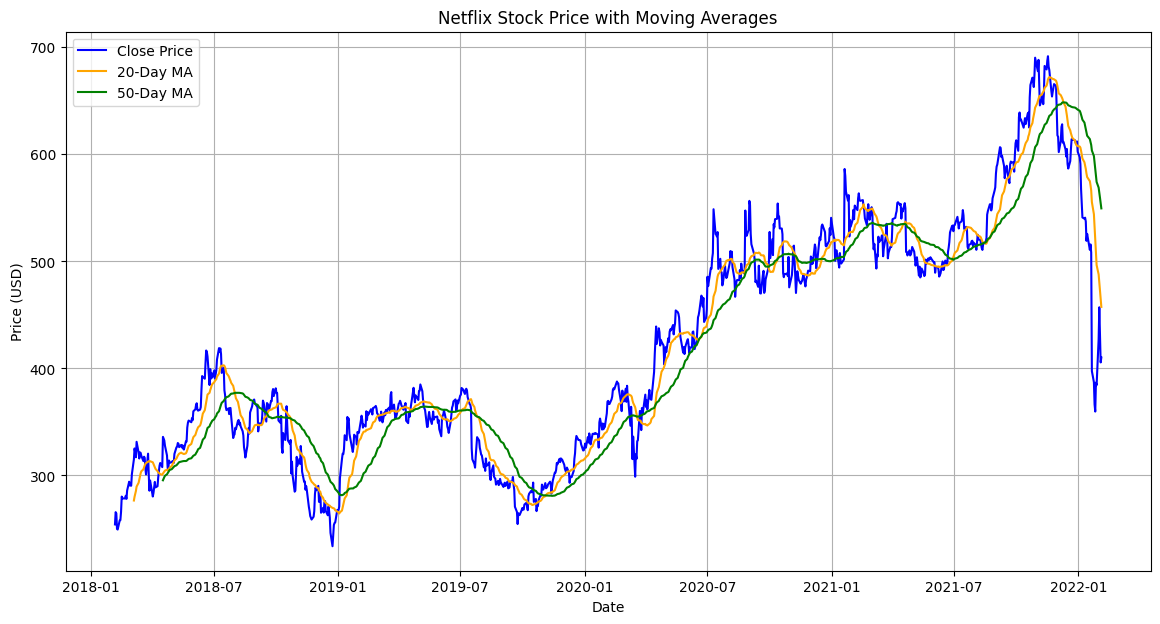

In [ ]:
# 20일,50일 이동 평균 계산
nflx_data['MA20'] = nflx_data['Close'].rolling(window=20).mean()
nflx_data['MA50'] = nflx_data['Close'].rolling(window=50).mean()

# 이동 평균 시각화
plt.figure(figsize=(14, 7))
plt.plot(nflx_data['Close'], label='Close Price', color='blue')
plt.plot(nflx_data['MA20'], label='20-Day MA', color='orange')
plt.plot(nflx_data['MA50'], label='50-Day MA', color='green')
plt.title('Netflix Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 데이터 정규화
nflx_data=nflx_data['Adj Close']
nflx_data.shape

(1009,)

In [ ]:
nflx_data

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


In [ ]:
# 데이터 전처리
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(nflx_data).reshape([nflx_data.shape[0],1]))

In [ ]:
df

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [ ]:
def create_seq(data,time_step=60):
    X=[]
    y=[]
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step)])
        y.append(data[i+time_step])
    return X,y

In [ ]:
time_step=100
X,y=create_seq(df,time_step)

In [ ]:
len(X),len(y)

(908, 908)

In [ ]:
X=np.array(X)
X=X.reshape(X.shape[0],X.shape[1],1)
y=np.array(y)

In [ ]:
X.shape,y.shape

((908, 100, 1), (908, 1))

In [ ]:
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# 데이터 크기 계산
total_samples = len(X)
train_size = int(total_samples * train_ratio)
val_size = int(total_samples * val_ratio)
test_size = total_samples - train_size - val_size

# 시간 순서에 따라 split
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]

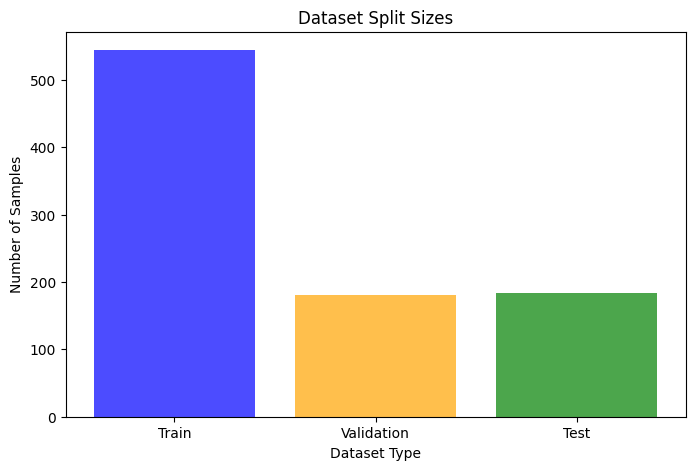

In [ ]:
import matplotlib.pyplot as plt

# 데이터 크기 계산
train_size = len(X_train)
val_size = len(X_val)
test_size = len(X_test)

# 데이터 크기 시각화
categories = ['Train', 'Validation', 'Test']
sizes = [train_size, val_size, test_size]

plt.figure(figsize=(8, 5))
plt.bar(categories, sizes, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title('Dataset Split Sizes')
plt.ylabel('Number of Samples')
plt.xlabel('Dataset Type')
plt.show()

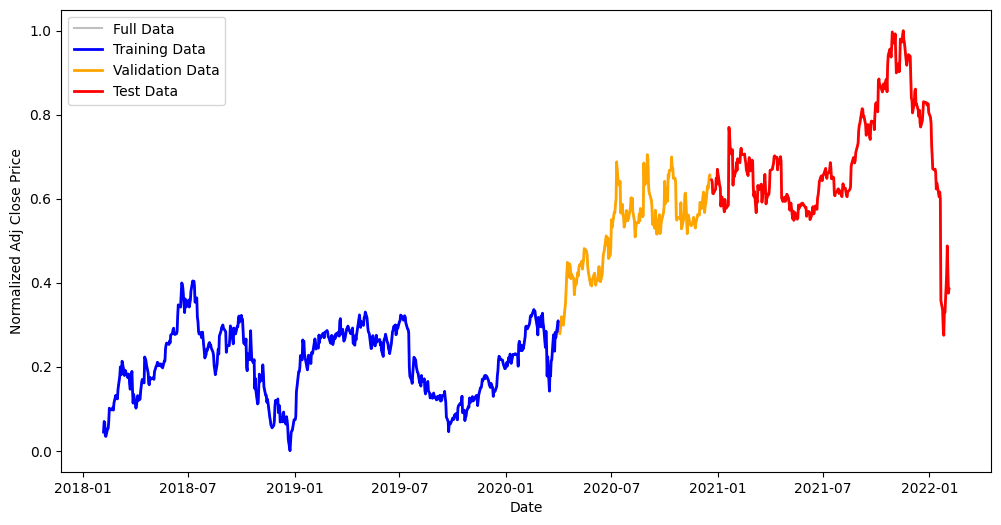

In [ ]:
# time index
time_index = nflx_data.index

plt.figure(figsize=(12, 6))

# full data
plt.plot(time_index, df, label='Full Data', color='gray', alpha=0.5)

# train data
plt.plot(time_index[:train_size], df[:train_size], label='Training Data', color='blue', lw=2)

# val data
plt.plot(time_index[train_size:train_size + val_size], df[train_size:train_size + val_size], label='Validation Data', color='orange', lw=2)

# test data
plt.plot(time_index[train_size + val_size:], df[train_size + val_size:], label='Test Data', color='red', lw=2)


plt.xlabel('Date')
plt.ylabel('Normalized Adj Close Price')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# 정규화 원래대로 돌려놓기
train_org = scaler.inverse_transform(y_train)
test_org = scaler.inverse_transform(y_test)

## 모델 1

#### RMSE
- train : 0.024443895929482744
- test : 0.05294353435576666


- train : 11.190660276155825
- test : 24.23807898198724

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 적합
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 325ms/step - loss: 0.0620 - val_loss: 0.0235
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - loss: 0.0091 - val_loss: 0.0268
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 394ms/step - loss: 0.0079 - val_loss: 0.0293
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step - loss: 0.0058 - val_loss: 0.0038
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 596ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - loss: 0.0030 - val_loss: 0.0038
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - loss: 0.0029 - val_loss: 0.0043
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 347ms/step - loss: 0.0029 - val_loss: 0.0063
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - loss: 0.

In [ ]:
# 학습 과정의 손실 기록 확인
train_loss = history.history['loss']       # train 데이터의 loss
val_loss = history.history['val_loss']    # test 데이터의 loss

# Loss 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 예측
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step


In [ ]:
# RMSE
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

0.024443895929482744
0.05294353435576666


In [ ]:
# 정규화 원래대로 돌려놓기
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# RMSE
print(math.sqrt(mean_squared_error(train_org, train_predict)))
print(math.sqrt(mean_squared_error(test_org, test_predict)))

11.190660276155825
24.23807898198724


## 모델 2

#### RMSE
- train : 0.027373837781715298
- test : 0.04712086450023601


- train : 12.53201497640695
- test : 21.572406997356243

In [ ]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=X_train[0].shape))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 64)             │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,929 (503.63 KB)

 Trainable params: 128,929 (503.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 적합
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - loss: 0.0651 - val_loss: 0.0069
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 598ms/step - loss: 0.0081 - val_loss: 0.0418
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 350ms/step - loss: 0.0068 - val_loss: 0.0143
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 551ms/step - loss: 0.0047 - val_loss: 0.0133
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 353ms/step - loss: 0.0033 - val_loss: 0.0044
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 356ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 605ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 351ms/step - loss: 0.0026 - val_loss: 0.0049
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 477ms/step - loss: 0.0027 - val_loss: 0.0035
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 676ms/step - loss: 0.

In [ ]:
# 학습 과정의 손실 기록 확인
train_loss = history.history['loss']       # train 데이터의 loss
val_loss = history.history['val_loss']    # test 데이터의 loss

# Loss 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 예측
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step


In [ ]:
# RMSE
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

0.027373837781715298
0.04712086450023601


In [ ]:
# 정규화 원래대로 돌려놓기
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# RMSE
print(math.sqrt(mean_squared_error(train_org, train_predict)))
print(math.sqrt(mean_squared_error(test_org, test_predict)))

12.53201497640695
21.572406997356243


## 모델 3

#### RMSE
- train : 0.027006103914168255
- test : 0.217239973551476

- train : 12.36366264668671
- test : 99.45463340507777

In [ ]:
model = Sequential()
model.add(LSTM(72, input_shape=(3,1)))
model.add(Dense(32,'relu'))
model.add(Dense(16,'relu'))
model.add(Dense(8,'relu'))
model.add(Dense(4,'relu'))
model.add(Dense(1,'linear'))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 72)                  │          21,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,353 (95.13 KB)

 Trainable params: 24,353 (95.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 적합
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.0846 - val_loss: 0.3644
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0807 - val_loss: 0.3347
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0681 - val_loss: 0.2837
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0449 - val_loss: 0.1365
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0168 - val_loss: 0.1078
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0141 - val_loss: 0.0839
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0150 - val_loss: 0.0906
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - loss: 0.0111 - val_loss: 0.0390
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - loss: 0.0078 - val_loss: 0.0334
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0038 - val_loss: 0.0175
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0029 - val_loss: 0.0102
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0025 - val

In [ ]:
# 학습 과정의 손실 기록 확인
train_loss = history.history['loss']       # train 데이터의 loss
val_loss = history.history['val_loss']    # test 데이터의 loss

# Loss 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 예측
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [ ]:
# RMSE
print(math.sqrt(mean_squared_error(y_train, train_predict)))
print(math.sqrt(mean_squared_error(y_test, test_predict)))

0.027006103914168255
0.217239973551476


In [ ]:
# 정규화 원래대로 돌려놓기
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# RMSE
print(math.sqrt(mean_squared_error(train_org, train_predict)))
print(math.sqrt(mean_squared_error(test_org, test_predict)))

12.36366264668671
99.45463340507777
